<a href="https://colab.research.google.com/github/crazy-lazy-life/Reinforcement_Learning_School_of_AI/blob/master/RL_Part1_Google_Dopamine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Installing necessary packages
!pip install --upgrade --no-cache-dir dopamine-rl
!pip install cmake
!pip install atari_py

Requirement already up-to-date: dopamine-rl in /usr/local/lib/python3.6/dist-packages (1.0.5)


In [0]:
#Importing necessary libraries
import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.atari import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags

In [0]:
BASE_PATH = '/temp/coalb_dope_run'
GAME = 'Asterix'

In [17]:
LOG_PATH = os.path.join(BASE_PATH, 'basic_agent', GAME)

class BasicAgent(object):
  """This agent randomly selects an action and sticks to it. It will change
  actions with probability switch_prob."""
  def __init__(self, sess, num_actions, switch_prob=0.1):
    #tensorflow session
    self._sess = sess
    #how many possible actions can it take?
    self._num_actions = num_actions
    # probability of switching actions in the next timestep?
    self._switch_prob = switch_prob
    #initialize the action to take (randomly)
    self._last_action = np.random.randint(num_actions)
    #not debugging
    self.eval_mode = False
  
  #How select an action? 
  #we define our policy here
  def _choose_action(self):
    if np.random.random() <= self._switch_prob:
      self._last_action = np.random.randint(self._num_actions)
    return self._last_action
    
  #when it checkpoints during training, anything we should do?
  def bundle_and_checkpoint(self, unused_checkpoint_dir, unused_iteration):
    pass
    
  #loading from checkpoint
  def unbundle(self, unused_checkpoint_dir, unused_checkpoint_version,
               unused_data):
    pass
  
  #first action to take
  def begin_episode(self, unused_observation):
    return self._choose_action()
  
  #cleanup
  def end_episode(self, unused_reward):
    pass
  
  #we can update our policy here
  #using the reward and observation
  #dynamic programming, Q learning, monte carlo methods, etc.
  def step(self, reward, observation):
    return self._choose_action()
  
def create_basic_agent(sess, environment, summary_writer = None):
  """The Runner class will expect a function of this type to create an agent."""
  return BasicAgent(sess, num_actions=environment.action_space.n,
                     switch_prob=0.2)

# Create the runner class with this agent. We use very small numbers of steps
# to terminate quickly, as this is mostly meant for demonstrating how one can
# use the framework. We also explicitly terminate after 110 iterations (instead
# of the standard 200) to demonstrate the plotting of partial runs.
basic_runner = run_experiment.Runner(LOG_PATH,
                                      create_basic_agent,
                                      game_name=GAME,
                                      num_iterations=200,
                                      training_steps=10,
                                      evaluation_steps=10,
                                      max_steps_per_episode=100)

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [18]:
#Training
basic_runner.run_experiment()
print("Training Done")

INFO:tensorflow:Beginning training...
INFO:tensorflow:Starting iteration 0
INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 557.49
INFO:tensorflow:Average undiscounted return per evaluation episode: 150.00
INFO:tensorflow:Starting iteration 1
INFO:tensorflow:Average undiscounted return per training episode: 50.00
INFO:tensorflow:Average training steps per second: 613.45
INFO:tensorflow:Average undiscounted return per evaluation episode: 350.00
INFO:tensorflow:Starting iteration 2
INFO:tensorflow:Average undiscounted return per training episode: 200.00
INFO:tensorflow:Average training steps per second: 646.27
INFO:tensorflow:Average undiscounted return per evaluation episode: 150.00
INFO:tensorflow:Starting iteration 3
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 666.17
INFO:tensorflow:Average undiscounted return per evaluation episode:

In [0]:
# @title Load baseline data
!gsutil -q -m cp -R gs://download-dopamine-rl/preprocessed-benchmarks/* /content/
experimental_data = colab_utils.load_baselines('/content')

In [20]:

# @title Load the training logs.
basic_data = colab_utils.read_experiment(log_path=LOG_PATH, verbose=True)
basic_data['agent'] = 'BasicAgent'
basic_data['run_number'] = 1
experimental_data[GAME] = experimental_data[GAME].merge(basic_data,
                                                        how='outer')

Reading statistics from: /temp/coalb_dope_run/basic_agent/Asterix//logs/log_199


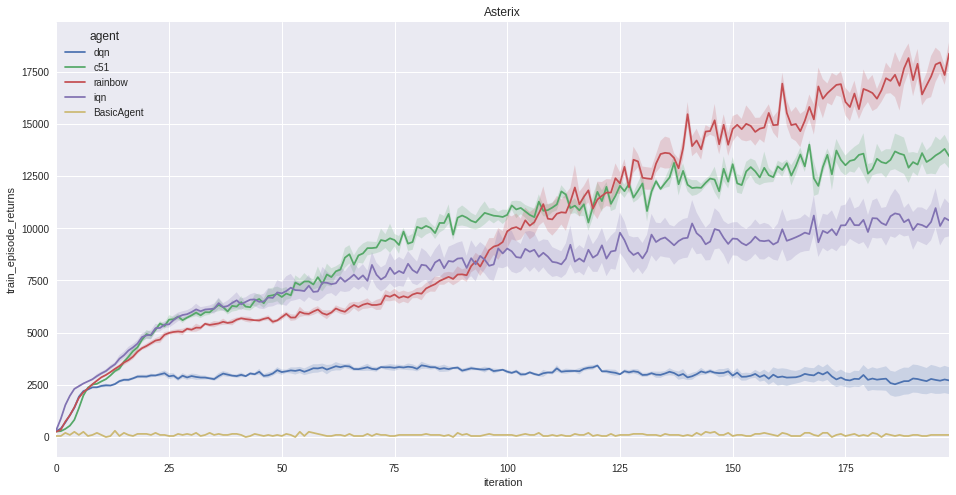

In [21]:
# @title Plot training results.

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=experimental_data[GAME], time='iteration', unit='run_number',
           condition='agent', value='train_episode_returns', ax=ax)
plt.title(GAME)
plt.show()